# Data

In [9]:
import pandas as pd

# df_path = './Duplicate_Question_stats.csv'
df_path = '/Volumes/DataDrive/stats/stackexchange_english_devel.xml--stackexchange_english_devel.xml--it50-mc5-s100.mdl.csv'
df = pd.read_csv(df_path)
df.head(n=5)

,question_id,related_question_id,category,tags,score,view_count,user_id,has_accepted_answer,no_of_comments,no_of_answers,total_answer_upvotes,best_answer_upvotes,jaccard_distance,length_difference,cosine_similarity,bigram_similarity,w2v_cosine_similarity,relevance
0,903935046121,903935046121_R166737334871,english,prepositions,0,142,30415.0,True,1,2,3,2,0.961,287,0.000,1.000,0.164,Irrelevant
1,903935046121,903935046121_R170167063682,english,american-english; british-english; dialects; a...,10,2023,5449.0,True,2,6,24,15,0.857,444,0.000,0.982,0.407,Irrelevant
2,903935046121,903935046121_R998151486195,english,american-english; speech; intonation,11,759,683.0,True,3,5,19,13,0.837,24,-0.000,0.970,0.335,Irrelevant
3,903935046121,903935046121_R338225401335,english,meaning,1,2113,21210.0,True,0,1,7,7,0.871,53,0.203,0.986,-0.036,Irrelevant
4,903935046121,903935046121_R113919792221,english,american-english; british-english; possessive;...,8,312,2085.0,True,12,3,8,7,0.919,1642,-0.236,0.991,0.039,Irrelevant


# Plots

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def create_plot(file_path):
    # Read file from CSV stats file
    df = pd.read_csv(file_path)
    
    # Load data for different 
    irrelevant = df[df.relevance == 'Irrelevant']
    related = df[df.relevance == 'Related']
    perfect_match = df[df.relevance == 'PerfectMatch']
    assert(irrelevant.shape[0] + related.shape[0] + perfect_match.shape[0] == df.shape[0])
    
    labels = ["Irrelevant", "Related", "Perfect Match"]
    parameters = ["jaccard_distance", "length_difference", "cosine_similarity", "bigram_similarity", "w2v_cosine_similarity"]

    fig, ax_list = plt.subplots(len(parameters), figsize=(16, 40))

    for i, param in enumerate(parameters):
        plot_data = [irrelevant[param], related[param], perfect_match[param]]
        ax_list[i].set_title(param)
        ax_list[i].boxplot(plot_data)
        ax_list[i].set_xticklabels(labels)

    plt.show()

In [10]:
df_paths = {'dev1': '/Volumes/DataDrive/stats/stackexchange_english_devel.xml--stackexchange_english_devel.xml--it50-mc5-s100.mdl.csv',
            'dev2': '/Volumes/DataDrive/stats/stackexchange_english_devel.xml--stackexchange_english_devel.xml--it50-mc5-s200.mdl.csv',
            'train1': '/Volumes/DataDrive/stats/stackexchange_english_train.xml--stackexchange_english_devel.xml--it50-mc5-s100.mdl.csv',
            'train2': '/Volumes/DataDrive/stats/stackexchange_english_train.xml--stackexchange_english_devel.xml--it50-mc5-s200.mdl.csv'}

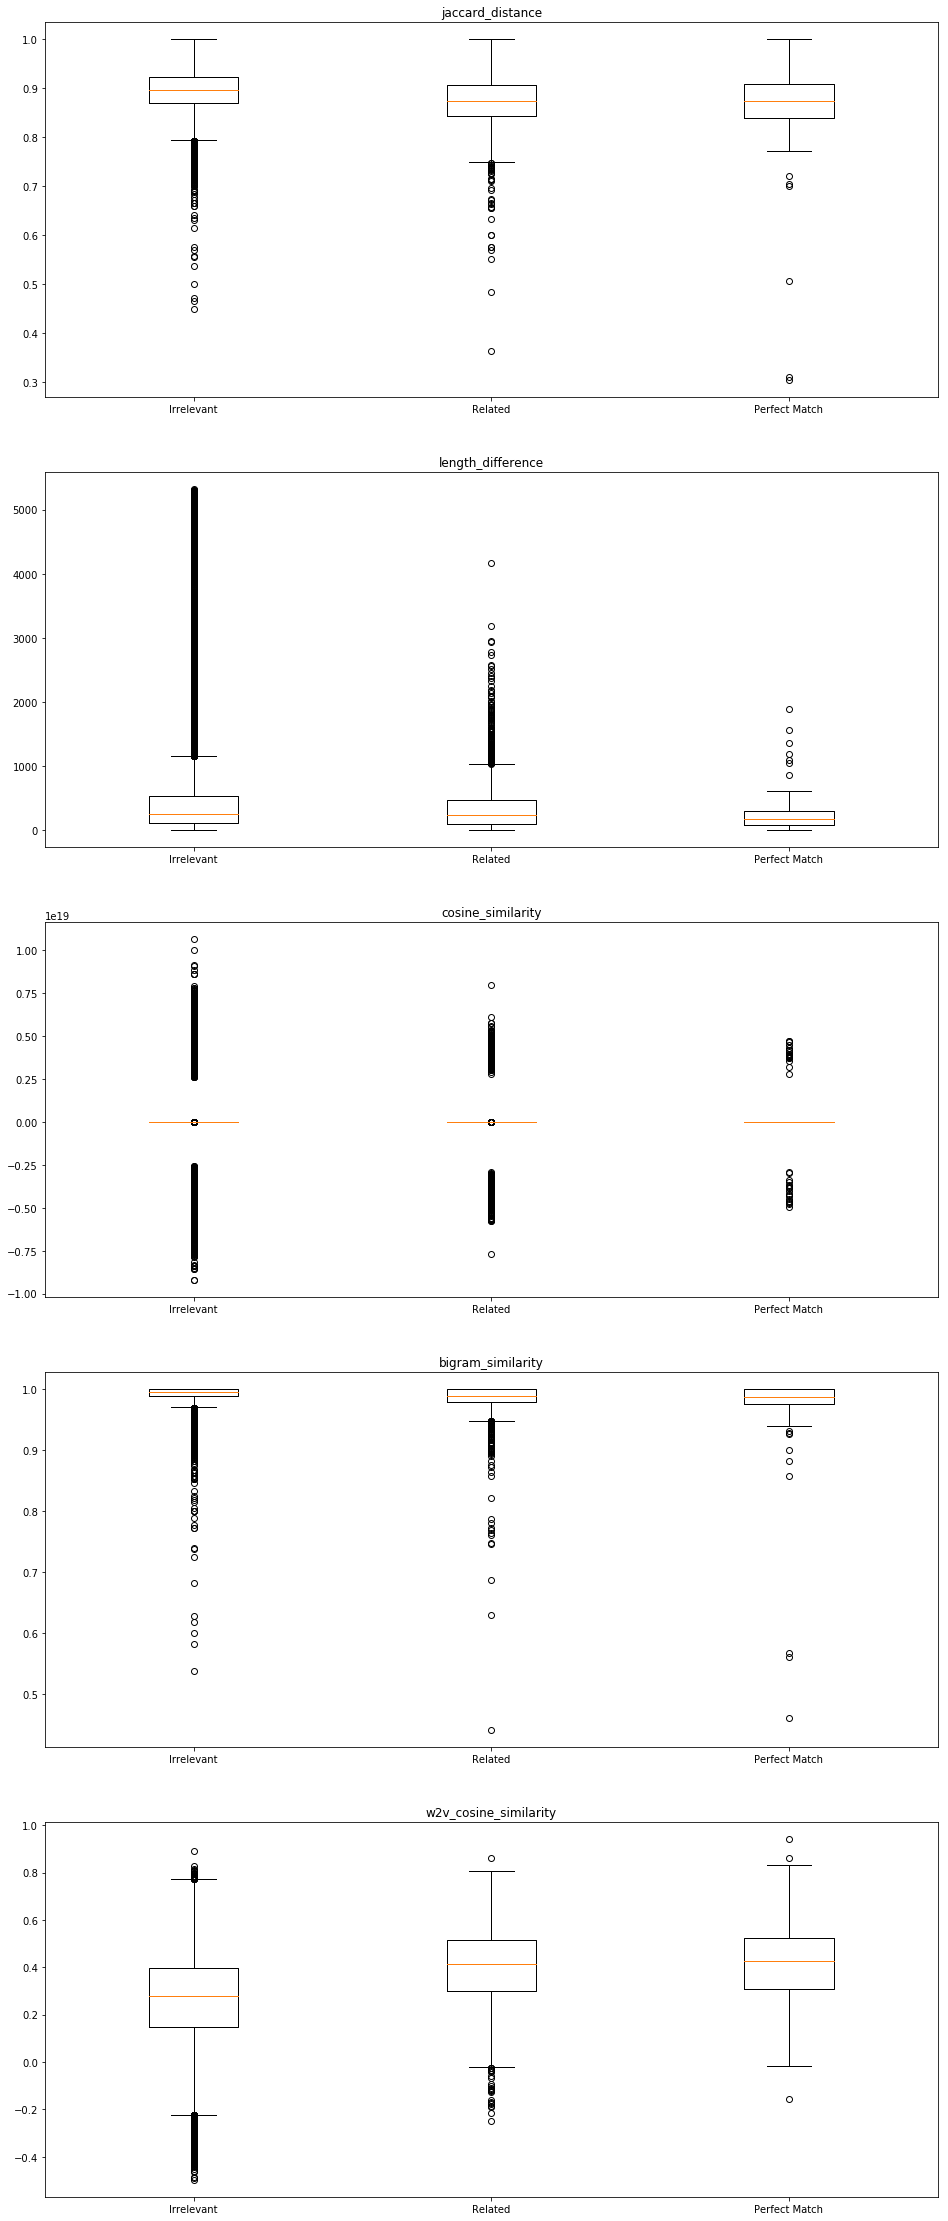

In [12]:
create_plot(df_paths['dev1'])

In [ ]:
create_plot(df_paths['dev2'])